<a href="https://colab.research.google.com/github/Patricialira-bot/ATIVIDADE-MOD-13/blob/main/Profissao_Cientista_de_Dados_M13_Projeto_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [ ]:
import pandas as pd

df = pd.read_csv("/content/MODULO7_PROJETOFINAL_BASE_SUPERMERCADO (1).csv", delimiter=',')

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [ ]:
import pandas as pd

# FIX: Adicionando a definição de 'df' aqui para resolver o NameError.
# Em um fluxo de trabalho normal, a célula anterior que carrega os dados (`bRBFyVB5wlny`) deveria ser executada primeiro.
df = pd.read_csv("/content/MODULO7_PROJETOFINAL_BASE_SUPERMERCADO (1).csv", delimiter=',')

#Agrupamento por categoria e caulando média e mediana
preco_stats = (
    df.groupby('Categoria')['Preco_Normal']
    .agg(['mean', 'median'])
    .reset_index()
)
preco_stats

,Categoria,mean,median
0,belleza-y-cuidado-personal,1783.556485,1569.0
1,comidas-preparadas,3095.043478,3290.0
2,congelados,2108.042553,1519.0
3,frutas,1724.473684,1195.0
4,instantaneos-y-sopas,765.491228,439.0
5,lacteos,2385.219239,989.0
6,verduras,1343.296875,1180.0


In [ ]:
#Seu código aqui para a mediana


Digite aqui as categorias:

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [ ]:
#Seu código aqui
desvio_padrao = (
    df.groupby('Categoria') ['Preco_Normal']
    .std()
    .reset_index(name='desvio_padrao')
    .sort_values(by='desvio_padrao', ascending=False)
    )
desvio_padrao




,Categoria,desvio_padrao
5,lacteos,3925.816164
0,belleza-y-cuidado-personal,2210.041719
2,congelados,2111.539896
1,comidas-preparadas,2019.911428
3,frutas,1639.151114
4,instantaneos-y-sopas,1170.232869
6,verduras,1012.699625


A categoria de lacteos apresentou o maior desvio padrão, indicando uma grande variação nos preços dos produtos dessa categoria.
Nessas categorias com o maoir desvio padrão, observa-se que a media tende a ser maior que a mediana, o que sugere a presença de preços mais altos que puxam a media para cima. Isso indica que os preços não são homogêneos e há possiveis valores extremos(outliers), fazendo com que a mediana represente melhor o preço tipico do que a media.

Digite nesse campo o comportamento que você identificou.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

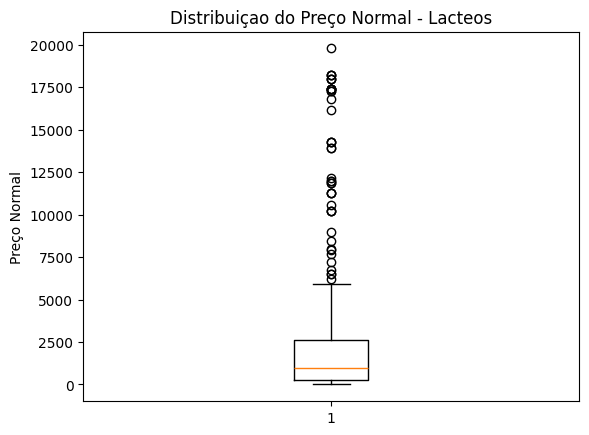

In [ ]:
import matplotlib.pyplot as plt

#Seu código aqui
categoria_maior_desvio = 'lacteos'

dados_lacteos = df.loc[
    df['Categoria'] == categoria_maior_desvio,
    'Preco_Normal'
]
plt.figure()
plt.boxplot(dados_lacteos)
plt.title('Distribuiçao do Preço Normal - Lacteos')
plt.ylabel('Preço Normal')
plt.show()

O boxplot da categoria com maior desvio padrao mostra uma districuição de preços bastante dispersa, indicando grande variações entre os valores dos produtos.
 Observa-se a presença de outliers, representados por pontos fora dos limites do boxplot, o que ajuda a explicar o alto desvio padrão.
 A concentraçao de outliers sugere que existem produtos com preços significativamente mais altos (ou mais baixo) em relação a maioria dos itens da categoria, impactando a media e aumrntando a variabilidade dos dados.





# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

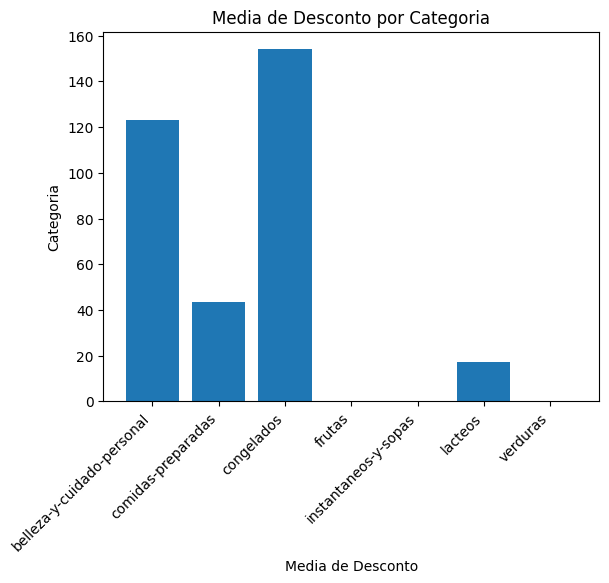

In [ ]:
# Seu código aqui
media_desconto_categoria = (
    df.groupby('Categoria') ['Desconto']
    .mean()
    .reset_index()
)
plt.figure()
plt.bar(
    media_desconto_categoria['Categoria'], # Added a comma here
    media_desconto_categoria['Desconto'] # Corrected variable name from media_desconto to media_desconto_categoria
)
plt.xticks( rotation=45,ha='right' ) # Corrected typo from 'ringht' to 'right'
plt.title('Media de Desconto por Categoria')
plt.xlabel('Media de Desconto')
plt.ylabel('Categoria') # Changed label to Categoria for consistency
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [ ]:
import plotly.express as px

# Seu código aqui
df_treemap = (
    df.groupby(['Categoria', 'Marca'])['Desconto']
    .mean()
    .reset_index()
)
fig = px.treemap(
    df_treemap,
    path=['Categoria', 'Marca'],
    values='Desconto',
    title='Media de Desconto por Categoria e Marca'
)

fig.show()

# Task
List the contents of the Google Drive folder `/content/drive/MyDrive/` to identify the correct filename of the CSV file.

## Verify file path

### Subtask:
List the contents of the mounted Google Drive to confirm the exact path and filename of the CSV file.


**Reasoning**:
To verify the file path, I need to list the contents of the mounted Google Drive, specifically the `/content/drive/MyDrive/` directory, using the `!ls` command as instructed.



In [ ]:
!ls /content/drive/MyDrive/

ls: cannot access '/content/drive/MyDrive/': No such file or directory


**Reasoning**:
The previous attempt to list the contents of `/content/drive/MyDrive/` resulted in a 'No such file or directory' error. This suggests that the path might be incorrect or the drive is not fully accessible. To troubleshoot, I will list the contents of the parent directory `/content/drive/` to verify if 'MyDrive' exists there and to confirm the correct path structure.



In [ ]:
!ls /content/drive/